In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# PHYS 4247 Integration Tutorial

## Author: Christopher Evans (`cevans216@gatech.edu`)

Frequently in physics you will come across integrals that cannot be solved analytically. For example, a function defined by output from a physical sensor or a numerical simulation is only known at a discrete sampling of points and thus can’t be integrated analytically. Even if an analytical expression for the integrand is known, there is no guarantee that the integral has a closed-form expression.  One well-known example of this is the error function 

$$ \mathrm{erf} z = \frac{2}{\sqrt{\pi}} \int_0^z e^{-x^2}\, dx $$

which is proportional to the normal cumulative distribution function.

Often the best approach to solving definite integrals like these is to use numerical integration.

## Numerical Integration

The goal here is to approximate the continous integral

$$ \int_a^b f(x)\,dx $$

with a finite sum $I_n$ that depends only on a _discrete_ sampling of the integrand $\left(x_j, f(x_j)\right)$ within the integral bounds $a \leq x_j \leq b$. A numerical integration scheme consists primarily of two components:

1. **Discretization**: Dividing the integration interval into smaller sub-intervals over which $f(x)$ can be locally well-approximated by simpler functions.
2. **Quadrature**: Approximating the area under $f(x)$ for each sub-interval.

Within the scope of this tutorial, all numerical integration schemes will take the same approach to discretization as outlined below.

### Discretization

Partition the interval $(a, b)$ into $n$ _uniform_ sub-intervals

$$ \left( x_0, x_1 \right),\; \left(x_1, x_2 \right),\; \ldots,\; \left( x_{n-1}, x_n \right) $$

each with width

$$ \Delta x = x_{j+1} - x_j = \frac{b-a}{n} $$

The $n+1$ endpoints are then

$$ x_j = a + j\Delta x\;;\; j = 0,1,\ldots,n $$

### Quadrature rules

The integral can then be calculated as the sum of the area under $f(x)$ for each sub-interval, as determined by a given quadrature rule. Since we can't integrate $f(x)$ analytically, this will invariably involve some sort of approximation.

The absolute error of the numerical integration $I_n$ is given by

$$ E_n = \left| \int_a^b f(x)\,dx - I_n \right| $$

When deciding what integration method to use, one of the most important things to look at is the convergence of the method. Any decent method should converge to the exact value of the integral in the limit of $n \rightarrow \infty$, however the important question is how quickly this happens. Barring other considerations, a method with a higher convergence rate is preferable since it will require fewer points to achieve a desired level of accuracy. Typically the convergence rate of a integration scheme is quantified by finding an upper bound for the absolute error and determining how it depends on $n$.

Many of the most commonly used quadrature rules come from constructing interpolating functions that are very simple to integrate, usually polynomials. As an example I will implement the simplest of these, the midpoint rule, which approximates the integrand as constant (a polynomial of degree zero) over the sub-
interval.

### The midpoint rule

The midpoint rule approximates $f(x)$ as constant over the sub-interval $\left( x_j, x_{j+1} \right)$ and equal to its value at the midpoint 

$$ x_{j + 1/2} = \frac{1}{2} \left( x_j + x_{j+1} \right) = x_j + \Delta x/2 $$

as illustrated in the figure below.

![alt text](integration-comparison.png "Title")

Therefore the approximate area is

$$ A_j = f\left( x_{j+1/2} \right) \Delta x $$

In order to implement this, I define a function called `integrate_midpoint` that takes the arguments

- `f`: The integrand function $f(x)$
- `a`: Lower integration bound
- `b`: Upper integration bound
- `n`: Number of sub-intervals for the discretization

and returns the result of the numerical integration `integral` using the following procedure

1. Calculate the $n+1$ end points $x_j$ and the sub-interval width $\Delta x$
2. Initialize `integral` to zero.
3. Iterate from $j = 0$ to $j = n-1$:
    1. Calculate the midpoint $x_{j+1/2}$
    2. Add the area $f(x_{j+1/2}) \Delta x$ to `integral`

In [2]:
def integrate_midpoint(f, a, b, n):
    x = np.linspace(a, b, num=n+1)
    dx = (b-a)/n
    
    integral = 0
    for j in range(n):
        xmid = (x[j] + x[j+1])/2
        integral += f(xmid)*dx
    
    return integral

We can check this against an integral that we can solve analytically

$$ \int_0^\pi \sin (x)\,dx = 2 $$

using $n = 1000$

In [3]:
integrate_midpoint(np.sin, 0, np.pi, 1000)

2.0000008224672694

For the midpoint rule, the absolute error can be bounded by

$$ \left| \int_a^b f(x)\,dx - I_n \right| \leq \frac{(b-a)^3}{24 n^2} \max_{a \leq x \leq b} \left| f''(x) \right| $$

Which means that the total error should drop off as $n^{-2}$. We can verify this by performing the integration with various values of $n$:

Power law index E ~ n^a: a = -2.00017


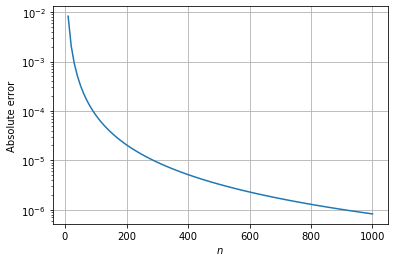

In [4]:
nvals = np.arange(10, 1010, 10)
integrals = np.array([integrate_midpoint(np.sin, 0, np.pi, n) for n in nvals])
error = np.abs(2 - integrals)

powerlaw_index = np.polyfit(np.log(nvals), np.log(error), 1)[0]
print(f'Power law index E ~ n^a: a = {powerlaw_index:.5f}')

fig = plt.figure()
plt.semilogy(nvals, error);
plt.xlabel(r'$n$');
plt.ylabel(r'Absolute error');
plt.grid();